<a href="https://colab.research.google.com/github/alfisyahri514/Cosmic_Handson/blob/main/Alfi_Copy_of_AIJ0202S2302_C01_Non_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-6 Non-Hierarchical Clustering

# Import Library

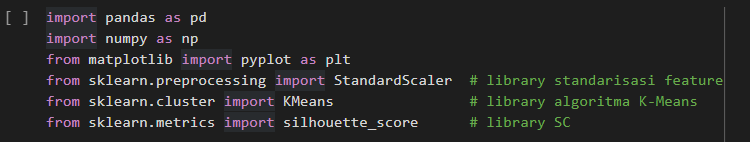

In [52]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler  # library standarisasi feature
from sklearn.cluster import KMeans                # library algoritma K-Means
from sklearn.metrics import silhouette_score       # library SC

Menginstal library machine learning visualization: [yellowbrick](https://www.scikit-yb.org/en/latest/).

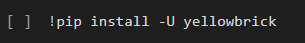

In [53]:
!pip install -U yellowbrick

Import library [KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html).

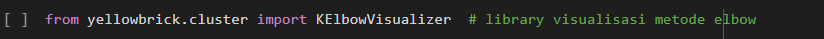

In [54]:
from yellowbrick.cluster import KElbowVisualizer   # library visualisasi metode elbow

# Load Dataset

Download dataset [di sini](https://drive.google.com/file/d/1kQhSkVx2BYYRHeGZtjjfgZTOMSf9YjhY/view?usp=sharing)

Pada hands-on ini, kita masih menggunakan dataset Mall_Customers.csv.

Berbeda dengan materi sebelumnya, kali ini, kita akan lakukan Customer Segmentation menggunakan algoritma K-Means.

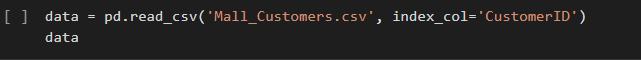

In [55]:
# Load dataset
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data


,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


Memeriksa kelengkapan dataset.

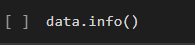

In [56]:
# Periksa informasi terkait dataset (metadata)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


Kita hanya memilih dua variable saja, yakni **AnnualIncome** dan **SpendingScore**.

> Note: Jika kita memilih variable Gender, maka kita perlu melakukan preprocessing terlebih dahulu.

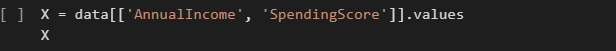

In [57]:
X = data[['AnnualIncome', 'SpendingScore']].values
X

array([[  15,   39],
       [  15,   81],
       [  16,    6],
       [  16,   77],
       [  17,   40],
       [  17,   76],
       [  18,    6],
       [  18,   94],
       [  19,    3],
       [  19,   72],
       [  19,   14],
       [  19,   99],
       [  20,   15],
       [  20,   77],
       [  20,   13],
       [  20,   79],
       [  21,   35],
       [  21,   66],
       [  23,   29],
       [  23,   98],
       [  24,   35],
       [  24,   73],
       [  25,    5],
       [  25,   73],
       [  28,   14],
       [  28,   82],
       [  28,   32],
       [  28,   61],
       [  29,   31],
       [  29,   87],
       [  30,    4],
       [  30,   73],
       [  33,    4],
       [  33,   92],
       [  33,   14],
       [  33,   81],
       [  34,   17],
       [  34,   73],
       [  37,   26],
       [  37,   75],
       [  38,   35],
       [  38,   92],
       [  39,   36],
       [  39,   61],
       [  39,   28],
       [  39,   65],
       [  40,   55],
       [  40,

Karena standar besar/kecil di kedua variabel berbeda, maka kita perlu melakukan standarisasi terlebih dahulu menggunakan `StandardScaler`.

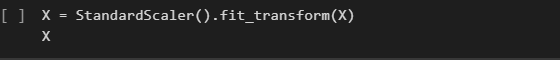

In [58]:
scaler = StandardScaler().fit_transform(X)
X

array([[  15,   39],
       [  15,   81],
       [  16,    6],
       [  16,   77],
       [  17,   40],
       [  17,   76],
       [  18,    6],
       [  18,   94],
       [  19,    3],
       [  19,   72],
       [  19,   14],
       [  19,   99],
       [  20,   15],
       [  20,   77],
       [  20,   13],
       [  20,   79],
       [  21,   35],
       [  21,   66],
       [  23,   29],
       [  23,   98],
       [  24,   35],
       [  24,   73],
       [  25,    5],
       [  25,   73],
       [  28,   14],
       [  28,   82],
       [  28,   32],
       [  28,   61],
       [  29,   31],
       [  29,   87],
       [  30,    4],
       [  30,   73],
       [  33,    4],
       [  33,   92],
       [  33,   14],
       [  33,   81],
       [  34,   17],
       [  34,   73],
       [  37,   26],
       [  37,   75],
       [  38,   35],
       [  38,   92],
       [  39,   36],
       [  39,   61],
       [  39,   28],
       [  39,   65],
       [  40,   55],
       [  40,

# Metode Elbow

Sebelum men-training model K-Means, sebaiknya kita mencari nilai K yang paling baik/optimal terlebih dahulu.

Nilai ini bisa kita cari menggunakan Metode Elbow atau `KElbowVisualizer` pada Python.



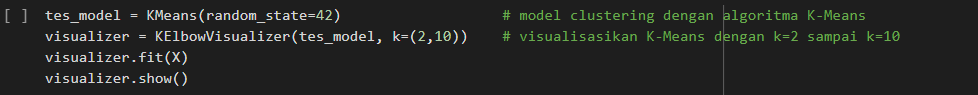

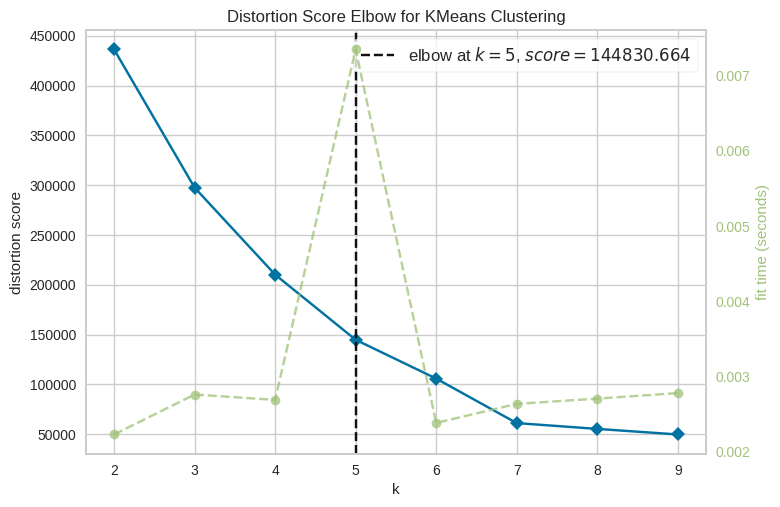

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
# Inisiasi model KMeans
tes_model = KMeans(random_state=42)  # model clustering dengan algoritma K-Means

# Inisiasi KElbowVisualizer
visualizer = KElbowVisualizer(tes_model, k=(2, 10))  # visulisasikan K-Means dengan k=2 sampai k=10

# Fit visualizer
visualizer.fit(X)
visualizer.show()

Berdasarkan hasil Metode Elbow, Titik Elbow berada pada K=5.

Maka nilai K terbaik/optimal adalah 5.

# Modeling

Selanjutnya kita lakukan training model menggunakan algoritma K-Means dengan:
- cluster bejumlah 5 (K=5)
- random state bernilai 42

Random state berguna untuk mengontrol ke-random-an inisiasi centroid.


Kita juga bisa men-tuning hyperparameter K-Means lainnya. Baca dokumentasi lengkapnya [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

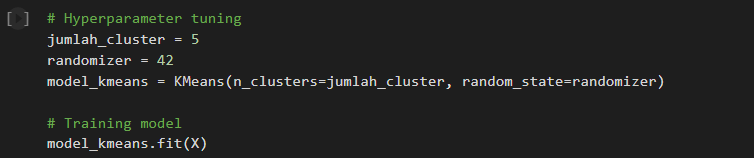

In [60]:
# Hyperparameter tuning
jumlah_cluster = 5
randomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)

# Training model
model_kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

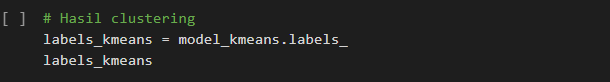

In [61]:
# Hasil clustering
labels_kmeans = model_kmeans.labels_
labels_kmeans


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 3, 0, 3, 0, 3, 1, 1, 1, 1, 3, 3, 3, 3],
      dtype=int32)

Karena kita menentukan K=5 (cluster berjumlah 5), maka kita akan mendapat 5 centroid.

Informasi (letak) tiap centroid bisa kita akses menggunakan method `cluster_centers_`.

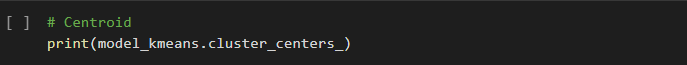

In [62]:
# Centroid
print(model_kmeans.cluster_centers_)


[[  87.29268293   19.2195122 ]
 [1167.           48.5       ]
 [  45.75         59.11607143]
 [  91.47826087   90.34782609]
 [  27.24324324   20.94594595]]


# Evaluasi Model

Ada beberapa metode yang bisa kita gunakan untuk mengevaluasi model clustering, antara lain:
1. Melihat dendrogram
2. Metode elbow
3. Visualisasi data
4. Silhouette Coefficient (SC)

Dendrogram digunakan pada model AHC.
Sedangkan, metode elbow sudah kita gunakan untuk menentukan nilai K terbaik.

Selanjutnya, kita akan mengevaluasi model clustering menggunakan visualisasi data dan SC.

## Visualisasi Hasil Clustering (Visualisasi Data)

Kita bisa memvisualisasikan hasil clustering dan centroid secara bersamaan menggunaan scatter plot.

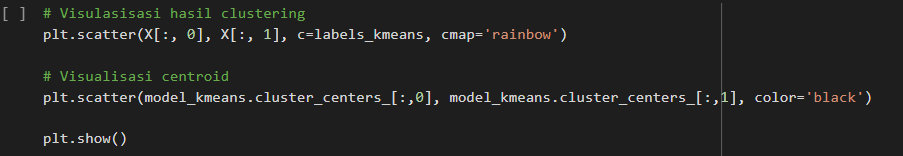

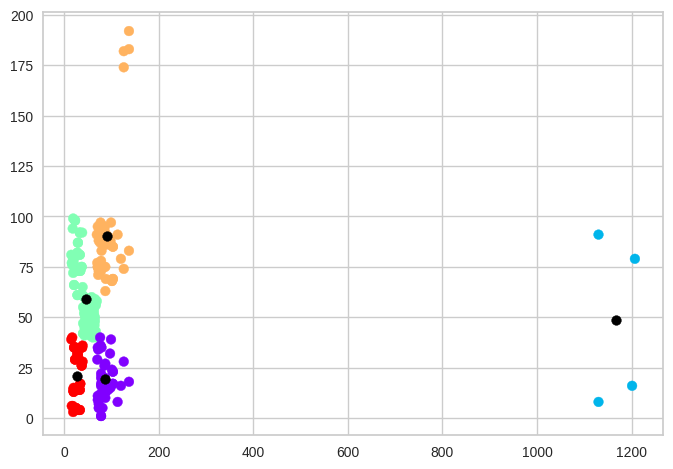

In [63]:
# Visualisasi hasil clustering
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='rainbow')

# Visualisasi centroid
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color='black')

plt.show()

Terlihat hasil clustering sudah cukup bagus.

---

**Note**:
- Kita bisa memvisualisasikan dataset secara 2D karena dataset tersebut hanya terdiri dari dua variable/feature, yakni **AnnualIncome** dan **SpendingScore**.
- Jika dataset kita terdiri dari tiga variable, maka kita masih bisa memvisualisasikan dataset secara 3D.
- Namun, kita tidak akan bisa memvisualisasikan dataset dengan jumlah variable lebih dari tiga, karena visualisasinya lebih dari 3D.
- Salah satu solusi visualisasi dataset dengan jumlah variable >3 adalah reduksi dimensi (dimensionality reduction).

Materi dimensionality reduction akan kita pelajari pada domain Data Science.

## Silhouette Coefficient

Kita bisa menggunakan `silhouette_score` untuk mendapat Silhouette Score model yang telah kita training.

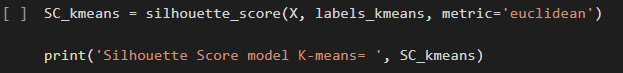

In [64]:
SC_kmeans = silhouette_score(X, labels_kmeans, metric='euclidean')

print('Silhouette Score model K-means= ', SC_kmeans)


Silhouette Score model K-means=  0.47241387889324893


Semakin Silhouette Score mendekati 1, maka model clustering akan semakin bagus.

Berdasarkan Silhouette Score, model K-Means yang telah kita training sudah cukup bagus.

Alangkah baiknya jika kita men-training lebih dari satu model clustering dengan berbagai algoritma dan tuning hyperparameter.

Kemudian, kita bandingkan Silhouette Score tiap model untuk mengetahui mana model terbagus.

# Kesimpulan

Simpan hasil clustering ke dalam dataset.

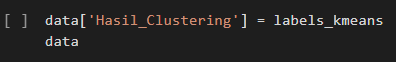

In [65]:
data['Hasil_Clustering'] = labels_kmeans
data


,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,2
3,Female,20,16,6,4
4,Female,23,16,77,2
5,Female,31,17,40,4
...,...,...,...,...,...
209,Female,35,1207,79,1
210,Female,45,126,182,3
211,Male,32,126,174,3


**Contoh**:

Menghitung rata-rata tiap cluster untuk menarik kesimpulan.

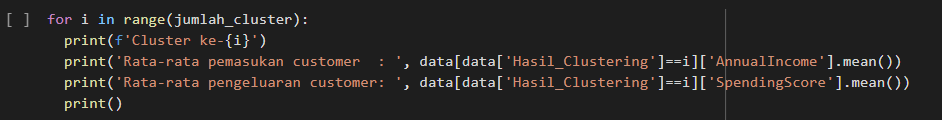

In [66]:
for i in range(jumlah_cluster):
    print(f'Cluster ke-{i}')
    print('Rata-rata pemasukan customer : ', data[data['Hasil_Clustering'] == i]['AnnualIncome'].mean())
    print('Rata-rata pengeluaran customer : ', data[data['Hasil_Clustering'] == i]['SpendingScore'].mean())
    print()


Cluster ke-0
Rata-rata pemasukan customer :  87.8
Rata-rata pengeluaran customer :  18.7

Cluster ke-1
Rata-rata pemasukan customer :  1167.0
Rata-rata pengeluaran customer :  48.5

Cluster ke-2
Rata-rata pemasukan customer :  45.93805309734513
Rata-rata pengeluaran customer :  58.94690265486726

Cluster ke-3
Rata-rata pemasukan customer :  91.47826086956522
Rata-rata pengeluaran customer :  90.34782608695652

Cluster ke-4
Rata-rata pemasukan customer :  27.243243243243242
Rata-rata pengeluaran customer :  20.945945945945947



Bisa kita simpulkan bahwa :    
- Cluster 0 adalah kelompok customer menengah ke bawah yang hemat (pengeluarannya sangat kecil)
- Cluster 1 adalah kelompok customer menengah ke bawah yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 2 adalah kelompok customer tingkat atas yang hemat (pengeluarannya sangat kecil)
- Cluster 3 adalah kelompok customer menengah ke atas yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 4 adalah kelompok customer menengah ke bawah yang boros (pengeluaran hampir sama dengan pemasukan)

---

**OPEN DISCUSSION**

Jika kamu adalah pemilik toko kredit dan akan menawarkan kredit mobil, cluster manakah yang menurutmu tepat?



# Exercise (Latihan)

Boleh pilih salah satu activity atau lakukan keduanya.

## Activity 1

- Gunakan dataset Mall_Customers.csv
- Gunakan variable Age, AnnualIncome, dan SpendingScore
- Lakukan clustering menggunakan model AHC dan K-Means
- Tentukan nilai K terbaik untuk setiap model
- Bandingkan SC model K-Means dengan AHC
- Tarik kesimpulan activity dan paparkan mana model terbaik

# Model K-Means

## Import

In [67]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler  # library standarisasi feature
from sklearn.cluster import KMeans                # library algoritma K-Means
from sklearn.metrics import silhouette_score       # library SC
import scipy.cluster.hierarchy as sch              # untuk AHC

## Load Dataset

In [68]:
# Load dataset
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data


,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


In [69]:
# Periksa informasi terkait dataset (metadata)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


In [70]:
X = data[['Age', 'AnnualIncome', 'SpendingScore']].values
X

array([[  19,   15,   39],
       [  21,   15,   81],
       [  20,   16,    6],
       [  23,   16,   77],
       [  31,   17,   40],
       [  22,   17,   76],
       [  35,   18,    6],
       [  23,   18,   94],
       [  64,   19,    3],
       [  30,   19,   72],
       [  67,   19,   14],
       [  35,   19,   99],
       [  58,   20,   15],
       [  24,   20,   77],
       [  37,   20,   13],
       [  22,   20,   79],
       [  35,   21,   35],
       [  20,   21,   66],
       [  52,   23,   29],
       [  35,   23,   98],
       [  35,   24,   35],
       [  25,   24,   73],
       [  46,   25,    5],
       [  31,   25,   73],
       [  54,   28,   14],
       [  29,   28,   82],
       [  45,   28,   32],
       [  35,   28,   61],
       [  40,   29,   31],
       [  23,   29,   87],
       [  60,   30,    4],
       [  21,   30,   73],
       [  53,   33,    4],
       [  18,   33,   92],
       [  49,   33,   14],
       [  21,   33,   81],
       [  42,   34,   17],
 

## Metode Elbow

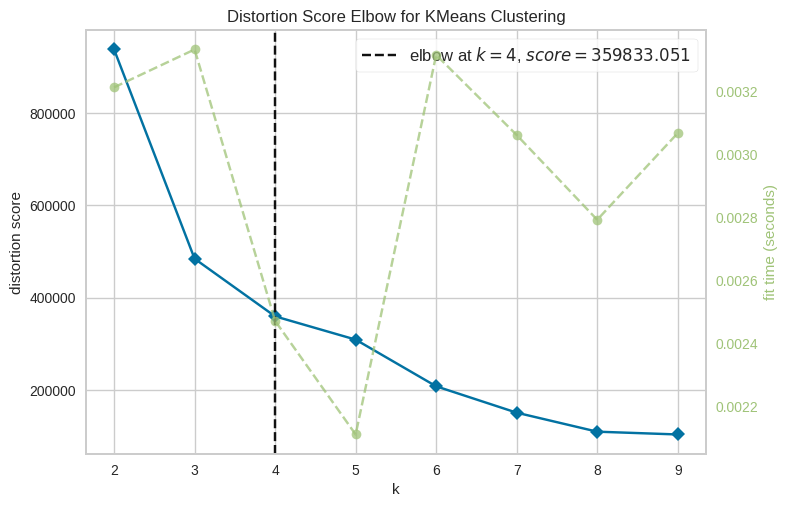

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
# Inisiasi model KMeans
tes_model = KMeans(random_state=42)  # model clustering dengan algoritma K-Means

# Inisiasi KElbowVisualizer
visualizer = KElbowVisualizer(tes_model, k=(2, 10))  # visulisasikan K-Means dengan k=2 sampai k=10

# Fit visualizer
visualizer.fit(X)
visualizer.show()

Berdasarkan hasil Metode Elbow, Titik Elbow berada pada K=4.

Maka nilai K terbaik/optimal adalah 4.

## Modeling

Selanjutnya kita lakukan training model menggunakan algoritma K-Means dengan:

cluster bejumlah 5 (K=5)
random state bernilai 42
Random state berguna untuk mengontrol ke-random-an inisiasi centroid.

Kita juga bisa men-tuning hyperparameter K-Means lainnya.

In [72]:
# Hyperparameter tuning
jumlah_cluster = 4
randomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)

# Training model
model_kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [73]:
# Hasil clustering
labels_kmeans = model_kmeans.labels_
labels_kmeans


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 0, 0, 0, 0],
      dtype=int32)

Karena kita menentukan K=5 (cluster berjumlah 4), maka kita akan mendapat 4 centroid.

Informasi (letak) tiap centroid bisa kita akses menggunakan method `cluster_centers_`.

In [74]:
# Centroid
print(model_kmeans.cluster_centers_)

[[  37.60344828   81.00862069   54.82758621]
 [  38.25       1167.           48.5       ]
 [  39.35652174   34.86086957   49.72173913]
 [ 339.4         102.6          52.4       ]]


Selanjutnya, kita akan mengevaluasi model clustering menggunakan visualisasi data dan SC

## Evaluasi Model

Ada beberapa metode yang bisa kita gunakan untuk mengevaluasi model clustering, antara lain:

Melihat dendrogram
Metode elbow
Visualisasi data
Silhouette Coefficient (SC)
Dendrogram digunakan pada model AHC. Sedangkan, metode elbow sudah kita gunakan untuk menentukan nilai K terbaik.

Selanjutnya, kita akan mengevaluasi model clustering menggunakan visualisasi data dan SC.

## Visualisasi Hasil Clustering (Visualisasi Data)

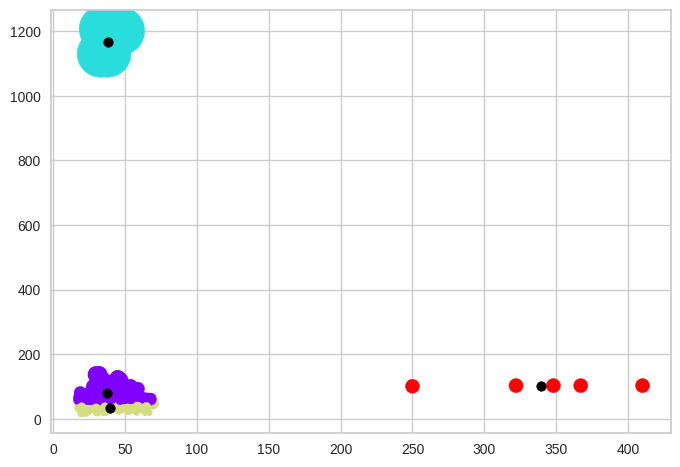

In [75]:
# Visualisasi hasil clustering
plt.scatter(X[:, 0], X[:, 1], X[:, 1], c=labels_kmeans, cmap='rainbow')

# Visualisasi centroid
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color='black')

plt.show()

Terlihat hasil clustering K-means tumpang tindih.

Perlu evaluasi lanjutan karna terdapat tumpang tindih yang signifikan atau cluster yang terlihat tidak teratur, mungkin Anda perlu mempertimbangkan:
Mengubah jumlah cluster (K).
Menggunakan metode clustering lain, seperti Agglomerative Clustering (AHC).
Melakukan praproses data lebih lanjut untuk meningkatkan pemisahan antar cluster.

Note:

Kita bisa memvisualisasikan dataset secara 2D karena dataset tersebut hanya terdiri dari dua variable/feature, yakni AnnualIncome dan SpendingScore.
Jika dataset kita terdiri dari tiga variable, maka kita masih bisa memvisualisasikan dataset secara 3D.
Namun, kita tidak akan bisa memvisualisasikan dataset dengan jumlah variable lebih dari tiga, karena visualisasinya lebih dari 3D.
Salah satu solusi visualisasi dataset dengan jumlah variable >3 adalah reduksi dimensi (dimensionality reduction).
Materi dimensionality reduction akan kita pelajari pada domain Data Science.

# Model AHC

## Import

In [76]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [77]:
# Load dataset
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


In [78]:
# Periksa informasi terkait dataset (metadata)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


In [79]:
X = data[['Age', 'AnnualIncome', 'SpendingScore']].values
X

array([[  19,   15,   39],
       [  21,   15,   81],
       [  20,   16,    6],
       [  23,   16,   77],
       [  31,   17,   40],
       [  22,   17,   76],
       [  35,   18,    6],
       [  23,   18,   94],
       [  64,   19,    3],
       [  30,   19,   72],
       [  67,   19,   14],
       [  35,   19,   99],
       [  58,   20,   15],
       [  24,   20,   77],
       [  37,   20,   13],
       [  22,   20,   79],
       [  35,   21,   35],
       [  20,   21,   66],
       [  52,   23,   29],
       [  35,   23,   98],
       [  35,   24,   35],
       [  25,   24,   73],
       [  46,   25,    5],
       [  31,   25,   73],
       [  54,   28,   14],
       [  29,   28,   82],
       [  45,   28,   32],
       [  35,   28,   61],
       [  40,   29,   31],
       [  23,   29,   87],
       [  60,   30,    4],
       [  21,   30,   73],
       [  53,   33,    4],
       [  18,   33,   92],
       [  49,   33,   14],
       [  21,   33,   81],
       [  42,   34,   17],
 

## Membentuk Dendogram

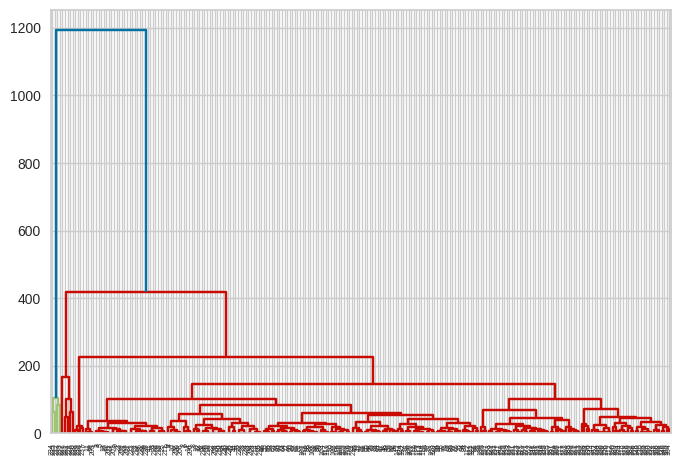

In [80]:
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

Terlihat bahwa garis cluster terpanjang berada dijumlah cluster 2, 3

## Modelling

In [81]:
# Hyperparameter tuning
jumlah_cluster = 2
persamaan_jarak = 'euclidean'
metode_linkage = 'complete'

# Inisiasi model AHC dengan parameter yang benar
model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, metric=persamaan_jarak, linkage=metode_linkage)

# Training model
model_AHC.fit(X)

AgglomerativeClustering(linkage='complete')

In [82]:
# Hasil clustering
labels_agglo = model_AHC.labels_
labels_agglo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

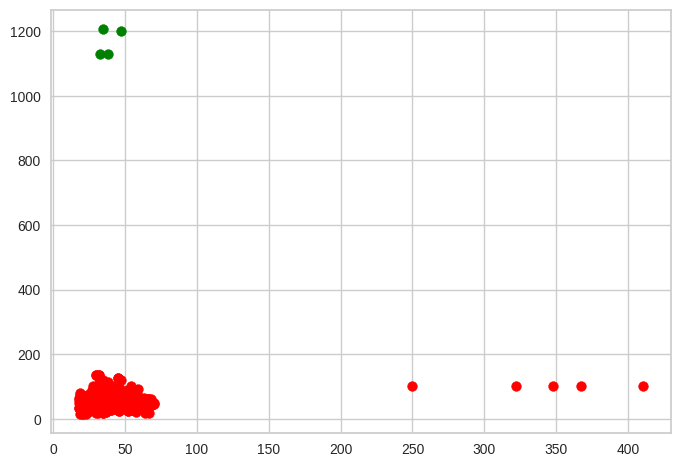

In [83]:
## Visualisasi Hasil Clustering
colors = ['red', 'green', 'blue', 'purple', 'magenta', 'orange', 'yellow']

for i in range(jumlah_cluster):
    plt.scatter(X[labels_agglo == i, 0], X[labels_agglo == i, 1], s=50, marker='o', color=colors[i])

Kita bisa lihat hasil clusteringnya sudah bagus, terlihat antar cluster cukup terpisah (tidak ada misalnya anggota cluster warna biru berada di tengah2 warna hijau).

Artinya kita bisa menggunakan hasil clustering ini.

In [84]:
data['Hasil_Clustering'] = labels_agglo
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,0
3,Female,20,16,6,0
4,Female,23,16,77,0
5,Female,31,17,40,0
...,...,...,...,...,...
209,Female,35,1207,79,1
210,Female,45,126,182,0
211,Male,32,126,174,0


## Kesimpulan

In [85]:
for i in range(jumlah_cluster):
    print(f'Cluster ke-{i}')
    print('Rata-rata pemasukan customer : ', data[data['Hasil_Clustering'] == i]['AnnualIncome'].mean())
    print('Rata-rata pengeluaran customer : ', data[data['Hasil_Clustering'] == i]['SpendingScore'].mean())
    print()


Cluster ke-0
Rata-rata pemasukan customer :  58.978813559322035
Rata-rata pengeluaran customer :  52.28813559322034

Cluster ke-1
Rata-rata pemasukan customer :  1167.0
Rata-rata pengeluaran customer :  48.5



**Kesimpulan:**
- Cluster 0 adalah kelompok customer dengan pemasukan yang lebih rendah dan pengeluaran yang hampir seimbang, menunjukkan kelompok dengan daya beli yang lebih rendah namun masih hemat. Mereka mungkin tidak cocok untuk penawaran kredit mobil dengan nilai tinggi karena pemasukan mereka cukup terbatas.
- Cluster 1 adalah kelompok customer dengan pemasukan yang sangat tinggi namun pengeluaran yang jauh lebih kecil, menunjukkan mereka kaya dan sangat hemat. Mereka mungkin merupakan kelompok yang ideal untuk penawaran kredit mobil, karena mereka memiliki pemasukan yang besar dan cukup hemat dalam pengeluaran, sehingga mampu untuk membayar cicilan mobil.

**Diskusi Terbuka:**
Jika kamu adalah pemilik toko kredit yang ingin menawarkan kredit mobil,
- Cluster 1 tampaknya menjadi target yang lebih baik. Meskipun pengeluaran mereka kecil, pemasukan mereka jauh lebih besar sehingga menunjukkan bahwa mereka memiliki kapasitas finansial untuk mengambil kredit besar seperti mobil. Selain itu, gaya hidup hemat menunjukkan bahwa mereka mungkin mampu mengelola kredit dengan baik tanpa risiko gagal bayar.

- Cluster 0, dengan pemasukan yang lebih rendah, mungkin kurang ideal untuk penawaran kredit mobil, kecuali jika mobil yang ditawarkan berada dalam kisaran harga yang sangat terjangkau.

**4. Bandingkan SC model K-Means dengan AHC** :
Model AHC mendapatkan hasil yang lebih baik karna saat di visualisasi datanya tidak tumpang tindih sedangkan model K-Means datanya tumpang tindih

**5. Tarik kesimpulan activity dan paparkan mana model terbaik**:
Model AHC

## Activity 2

1. Buat kelompok
2. Carilah dataset untuk kasus clustering di sekitarmu atau di internet
3. Lakukan clustering menggunakan algortima K-Means (ikuti step pada hands-on ini)
4. Buat kesimpulan clustering
5. Kumpulkan ke HC

# Import

In [86]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler  # library standarisasi feature
from sklearn.cluster import KMeans                # library algoritma K-Means
from sklearn.metrics import silhouette_score       # library SC

# Load Dataset

In [87]:
# Load dataset
data = pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [88]:
# Import library yang diperlukan
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset Iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [89]:
# Mengambil dua fitur yang akan digunakan untuk clustering
X = data[['sepal length (cm)', 'sepal width (cm)']].values

In [90]:
# Preprocessing data (standardisasi)
scaler = StandardScaler().fit_transform(X)
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

## Metode Elbow

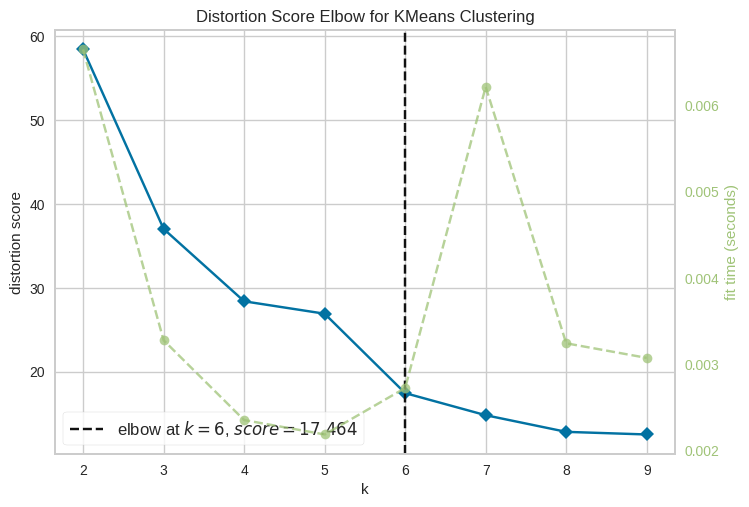

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [91]:
# Inisiasi model KMeans
tes_model = KMeans(random_state=42)  # model clustering dengan algoritma K-Means

# Inisiasi KElbowVisualizer
visualizer = KElbowVisualizer(tes_model, k=(2, 10))  # visulisasikan K-Means dengan k=2 sampai k=10

# Fit visualizer
visualizer.fit(X)
visualizer.show()

Berdasarkan hasil Metode Elbow, Titik Elbow berada pada K=5.

Maka nilai K terbaik/optimal adalah 5.

# Modeling

In [92]:
# Hyperparameter tuning
jumlah_cluster = 5
randomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)

# Training model
model_kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [93]:
# Hasil clustering
labels_kmeans = model_kmeans.labels_
labels_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 0, 4, 1, 3, 3, 0, 1, 4, 1, 1, 0, 3, 3, 3, 4,
       0, 3, 3, 1, 0, 3, 3, 3, 3, 4, 4, 4, 3, 3, 1, 1, 3, 3, 1, 0, 4, 3,
       0, 1, 1, 0, 3, 1, 1, 0, 3, 3, 1, 3, 0, 3, 4, 3, 0, 4, 1, 4, 3, 4,
       0, 3, 4, 3, 3, 0, 0, 4, 4, 3, 4, 3, 4, 3, 4, 4, 3, 0, 3, 4, 4, 4,
       3, 3, 3, 4, 0, 0, 0, 4, 4, 4, 3, 4, 4, 4, 3, 0, 0, 0], dtype=int32)

In [94]:
# Centroid
print(model_kmeans.cluster_centers_)

[[6.11304348 3.19565217]
 [5.24666667 2.47333333]
 [4.98510638 3.43191489]
 [6.05833333 2.68611111]
 [7.06206897 3.10344828]]


# Evaluasi Model

Dendrogram digunakan pada model AHC. Sedangkan, metode elbow sudah kita gunakan untuk menentukan nilai K terbaik.

Selanjutnya, kita akan mengevaluasi model clustering menggunakan visualisasi data dan SC.

## Visualisasi Hasil Clustering (Visualisasi Data)

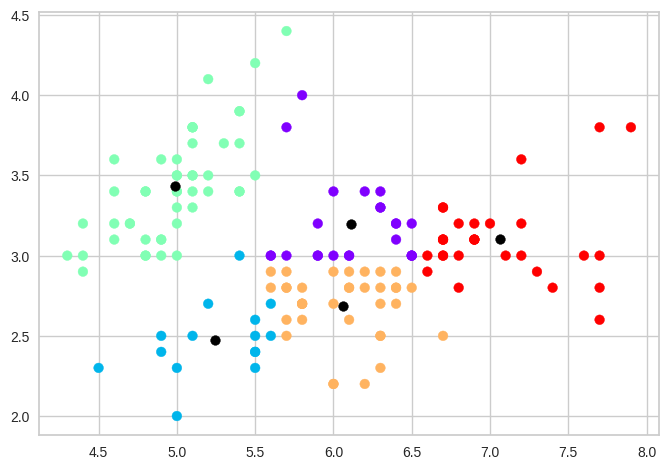

In [95]:
# Visualisasi hasil clustering
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='rainbow')

# Visualisasi centroid
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color='black')

plt.show()

Terlihat hasil clustering sudah cukup bagus.

---

**Note**:
- Kita bisa memvisualisasikan dataset secara 2D karena dataset tersebut hanya terdiri dari dua variable/feature, yakni **AnnualIncome** dan **SpendingScore**.
- Jika dataset kita terdiri dari tiga variable, maka kita masih bisa memvisualisasikan dataset secara 3D.
- Namun, kita tidak akan bisa memvisualisasikan dataset dengan jumlah variable lebih dari tiga, karena visualisasinya lebih dari 3D.
- Salah satu solusi visualisasi dataset dengan jumlah variable >3 adalah reduksi dimensi (dimensionality reduction).

Materi dimensionality reduction akan kita pelajari pada domain Data Science.

## Silhouette Coefficient

Kita bisa menggunakan `silhouette_score` untuk mendapat Silhouette Score model yang telah kita training.

In [96]:
SC_kmeans = silhouette_score(X, labels_kmeans, metric='euclidean')

print('Silhouette Score model K-means= ', SC_kmeans)

Silhouette Score model K-means=  0.34312790770010887


Semakin Silhouette Score mendekati 1, maka model clustering akan semakin bagus.

Berdasarkan Silhouette Score, model K-Means yang telah kita training sudah cukup bagus.

# Kesimpulan

In [97]:
data['Hasil_Clustering'] = labels_kmeans
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Hasil_Clustering
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,4
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [99]:
for i in range(jumlah_cluster):
    print(f'Cluster ke-{i}')

    # Check if 'annual_income' is in the DataFrame's columns
    if 'annual_income' in data.columns:
        print('Rata-rata pemasukan customer : ', data[data['Hasil_Clustering'] == i]['annual_income'].mean())
    else:
        print("Column 'annual_income' not found in DataFrame.")

        # Consider alternatives like printing available columns for debugging
        print("Available columns:", data.columns)
    print()

Cluster ke-0
Column 'annual_income' not found in DataFrame.
Available columns: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Hasil_Clustering'],
      dtype='object')

Cluster ke-1
Column 'annual_income' not found in DataFrame.
Available columns: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Hasil_Clustering'],
      dtype='object')

Cluster ke-2
Column 'annual_income' not found in DataFrame.
Available columns: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Hasil_Clustering'],
      dtype='object')

Cluster ke-3
Column 'annual_income' not found in DataFrame.
Available columns: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Hasil_Clustering'],
      dtype='object')

Cluster ke-4
Column 'annual_income' not found in DataFrame.
Available columns: Index(['sepal length (cm)', 'sepal width (cm)